In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df_edge = pd.read_csv('elliptic_dataset1/elliptic_txs_edgelist.csv')
df_class = pd.read_csv('elliptic_dataset1/elliptic_txs_classes.csv')
df_features = pd.read_csv('elliptic_dataset1/elliptic_txs_features.csv',header=None)

In [3]:
df_class.columns = ['txId', 'class']
df_edge.columns = ['source', 'target']

In [4]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [5]:
# renaming columns
df_features.columns = ['txId', 'time step'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]

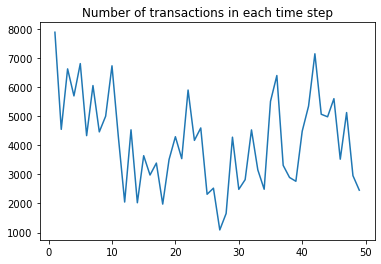

In [6]:
test = df_features['time step'].value_counts().sort_index().plot();
plt.title('Number of transactions in each time step');

In [7]:
# merge with classes
df_class_features = pd.merge(df_class, df_features)
df_class_features.head()

,txId,class,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,unknown,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,unknown,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,unknown,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,unknown,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


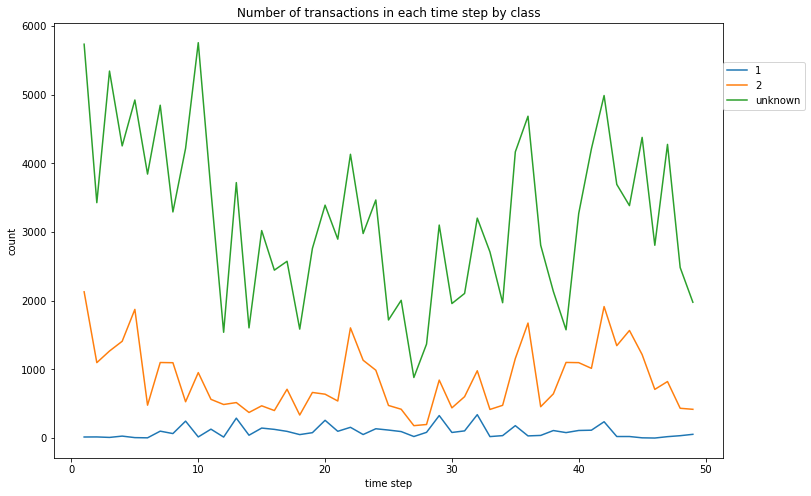

In [8]:
plt.figure(figsize=(12, 8))
grouped = df_class_features.groupby(['time step', 'class'])['txId'].count().reset_index().rename(columns={'txId': 'count'})
sns.lineplot(x='time step', y='count', hue='class', data=grouped);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

In [9]:
ilicit_ids = df_class_features.loc[(df_class_features['time step'] == 37) & (df_class_features['class'] == '1'), 'txId']
ilicit_edges = df_edge.loc[df_edge['source'].isin(ilicit_ids)]

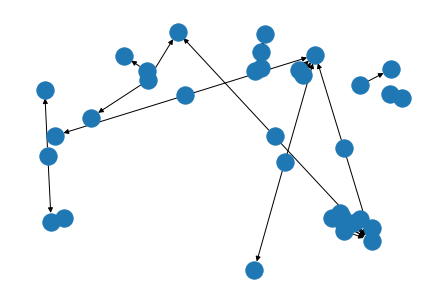

In [10]:
graph = nx.from_pandas_edgelist(ilicit_edges, source = 'source', target = 'target', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph, seed = 100)
nx.draw(graph, with_labels=False, pos=pos)

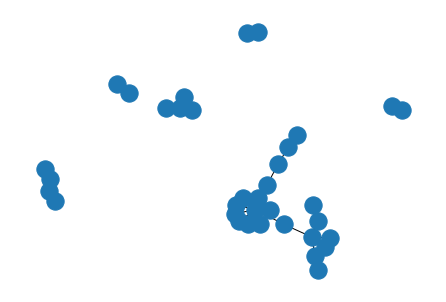

In [11]:
graph1 = nx.from_pandas_edgelist(ilicit_edges, source = 'source', target = 'target', 
                                 create_using = nx.Graph())
pos1 = nx.spring_layout(graph1, seed= 100)
nx.draw(graph1, with_labels=False, pos=pos1)

In [12]:
print(df_class_features)

             txId    class  time step  trans_feat_0  trans_feat_1  \
0       230425980  unknown          1     -0.171469     -0.184668   
1         5530458  unknown          1     -0.171484     -0.184668   
2       232022460  unknown          1     -0.172107     -0.184668   
3       232438397        2          1      0.163054      1.963790   
4       230460314  unknown          1      1.011523     -0.081127   
...           ...      ...        ...           ...           ...   
203764  173077460  unknown         49     -0.145771     -0.163752   
203765  158577750  unknown         49     -0.165920     -0.123607   
203766  158375402        1         49     -0.172014     -0.078182   
203767  158654197  unknown         49     -0.172842     -0.176622   
203768  157597225  unknown         49     -0.012037     -0.132276   

        trans_feat_2  trans_feat_3  trans_feat_4  trans_feat_5  trans_feat_6  \
0          -1.201369     -0.121970     -0.043875     -0.113002     -0.061584   
1          

In [13]:
Identified_ids = df_class_features.loc[(df_class_features['class'] != "unknown"), 'txId']
print(Identified_ids)

3         232438397
9         232029206
10        232344069
11         27553029
16          3881097
            ...    
203752     80329479
203754    158406298
203759    158375075
203763    147478192
203766    158375402
Name: txId, Length: 46564, dtype: int64


In [14]:
df_class_identified = df_class.loc[df_class['txId'].isin(Identified_ids)]
df_edges_identified = df_edge.loc[df_edge['source'].isin(Identified_ids)]
print(df_edges_identified)

           source     target
5       232344069   27553029
8         3881097  232457116
15      232051089  232470704
22      232033533  230470022
26      230473487    7089694
...           ...        ...
234338  194020062   47521535
234340  158574502  109383451
234344  158594124  157631640
234347  157631640   21644119
234350  158365409  157930723

[53198 rows x 2 columns]


In [15]:
df_edges_identified = df_edge.loc[df_edge['source'].isin(Identified_ids)]
df_features_identified = df_features.loc[df_features['txId'].isin(Identified_ids)]
df_class_feature_identified = pd.merge(df_class_identified, df_features_identified)


In [16]:

Unknown_ids = df_class_features.loc[(df_class_features['class'] == "unknown"), 'txId']
df_class_unknown = df_class.loc[df_class['txId'].isin(Unknown_ids)]
df_edges_unknown = df_edge.loc[df_edge['source'].isin(Unknown_ids)]
df_features_unknown = df_features.loc[df_features['txId'].isin(Unknown_ids)]
df_class_feature_unknown = pd.merge(df_class_unknown, df_features_unknown)

In [17]:
print("Identified transaction")
df_class_feature_identified.head()

Identified transaction


,txId,class,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [18]:
df_class_feature_unknown.loc[df_class_feature_unknown['class'] == 'unknown', 'class'] = 3
print("Unknown transaction")
df_class_feature_unknown.head()

Unknown transaction


,txId,class,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,230460314,3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,3,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [19]:
# X = df_class_feature_identified.drop(columns=['txId', 'class', 'time step']) # drop class, text id and time step
# y = df_class_feature_identified[['class']]

# X = df_class_features.drop(df_class_features) # drop class, text id and time step
# y = df_class_features[['class']]

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)
X_train = df_class_feature_identified[df_class_feature_identified['time step'] <= 30]
X_test = df_class_feature_identified[df_class_feature_identified['time step'] > 30]
y_train = X_train['class']
y_test = X_test['class']

X_train = X_train.drop(columns=['txId', 'class', 'time step'])
X_test = X_test.drop(columns=['txId', 'class', 'time step'])

In [20]:
model_RF = RandomForestClassifier(n_estimators = 100, bootstrap = False, min_samples_leaf=1, max_depth=50).fit(X_train.values,y_train.values)
y_preds = model_RF.predict(X_test.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

Random Forest Classifier
Precision:0.983 
Recall:0.995 
F1 Score:0.989


In [21]:
print(y_test.value_counts())
print(np.count_nonzero (y_preds == '2'))
print(np.count_nonzero (y_preds == '1'))

2    18068
1     1591
Name: class, dtype: int64
18300
1359


In [22]:
RF_AF_prec = []
RF_AF_rec = []
RF_AF_f1 = []
for time in range(31, 50):
    test_X = df_class_feature_identified[df_class_feature_identified['time step'] == time]
    test_y = test_X['class']
    test_X = test_X.drop(columns=['txId', 'class', 'time step'])
    
    y_preds = model_RF.predict(test_X.values)
    prec,rec,f1,num = precision_recall_fscore_support(test_y.values, y_preds)
    
    RF_AF_prec.append(prec[1])
    RF_AF_rec.append(rec[1])
    RF_AF_f1.append(f1[1])

In [23]:
X_train_localfeatures = X_train.iloc[:, 0:94] # drop class, text id and time step
X_test_localfeatures = X_test.iloc[:, 0:94]

In [24]:
model_RF = RandomForestClassifier(n_estimators = 100, bootstrap = False, min_samples_leaf=1, max_depth=50).fit(X_train_localfeatures.values,y_train.values)
y_preds = model_RF.predict(X_test_localfeatures.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

Random Forest Classifier
Precision:0.982 
Recall:0.992 
F1 Score:0.987


In [25]:
RF_LF_prec = []
RF_LF_rec = []
RF_LF_f1 = []
for time in range(31, 50):
    test_X = df_class_feature_identified[df_class_feature_identified['time step'] == time]
    test_y = test_X['class']
    test_X = test_X.drop(columns=['txId', 'class', 'time step'])
    test_X = test_X.iloc[:, 0:94]
    
    y_preds = model_RF.predict(test_X.values)
    prec,rec,f1,num = precision_recall_fscore_support(test_y.values, y_preds)
    
    RF_LF_prec.append(prec[1])
    RF_LF_rec.append(rec[1])
    RF_LF_f1.append(f1[1])

In [26]:
Timestep = []
for time in range(31, 50):
    Timestep.append(time)
    
Timestep = np.array(Timestep)

In [27]:
print(X_train)

       trans_feat_0  trans_feat_1  trans_feat_2  trans_feat_3  trans_feat_4  \
0          0.163054      1.963790     -0.646376     12.409294     -0.063725   
1         -0.005027      0.578941     -0.091383      4.380281     -0.063725   
2         -0.147852     -0.184668     -1.201369     -0.121970     -0.043875   
3         -0.151357     -0.184668     -1.201369     -0.121970     -0.043875   
4         -0.172306     -0.184668     -1.201369      0.028105     -0.043875   
...             ...           ...           ...           ...           ...   
26900     -0.130516     -0.146099     -0.091383     -0.121970     -0.043875   
26901     -0.167430     -0.146099     -0.091383     -0.121970     -0.043875   
26902     -0.167644     -0.146099     -0.091383     -0.121970     -0.043875   
26903     -0.090095      0.511899      0.463609      0.478330     -0.004174   
26904     -0.172856     -0.050065     -0.646376     -0.121970     -0.024025   

       trans_feat_5  trans_feat_6  trans_feat_7  tr

In [28]:
y_train_new = [-1 if i=='1' else 1 for i in y_train]
print(y_train_new.count(1))

23951


In [29]:
from sklearn import svm
Model_SVM = svm.OneClassSVM(gamma = 0.01, kernel = 'poly', nu = 0.01)
Model_SVM.fit(X_train.values,y_train_new)

y_preds = Model_SVM.predict(X_test.values)

y_preds_new = ['1' if i==-1 else '2' for i in y_preds]

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_new)

print("One-class SVM")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

One-class SVM
Precision:0.892 
Recall:0.577 
F1 Score:0.701


In [34]:
print(y_preds_new)

['2', '2', '2', '2', '1', '2', '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '1', '2', '2', '2', '1', '2', '1', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '1', '2', '2', '2', '2', '2', '1', '1', '2', '1', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '1', '2',

In [87]:
print(X_train)

       trans_feat_0  trans_feat_1  trans_feat_2  trans_feat_3  trans_feat_4  \
0          0.163054      1.963790     -0.646376     12.409294     -0.063725   
1         -0.005027      0.578941     -0.091383      4.380281     -0.063725   
2         -0.147852     -0.184668     -1.201369     -0.121970     -0.043875   
3         -0.151357     -0.184668     -1.201369     -0.121970     -0.043875   
4         -0.172306     -0.184668     -1.201369      0.028105     -0.043875   
...             ...           ...           ...           ...           ...   
26900     -0.130516     -0.146099     -0.091383     -0.121970     -0.043875   
26901     -0.167430     -0.146099     -0.091383     -0.121970     -0.043875   
26902     -0.167644     -0.146099     -0.091383     -0.121970     -0.043875   
26903     -0.090095      0.511899      0.463609      0.478330     -0.004174   
26904     -0.172856     -0.050065     -0.646376     -0.121970     -0.024025   

       trans_feat_5  trans_feat_6  trans_feat_7  tr

In [83]:
print(y_test.value_counts())
print(y_preds_new.count('2'))
print(y_preds_new.count('1'))

2    18068
1     1591
Name: class, dtype: int64
11688
7971


In [45]:
print(y_test.values.size)
print(len(y_preds_new))

19659
19659


In [42]:
print(y_preds_new.count('2'))

11688


In [108]:
SVM_AF_prec = []
SVM_AF_rec = []
SVM_AF_f1 = []
for time in range(31, 50):
    test_X = df_class_feature_identified[df_class_feature_identified['time step'] == time]
    test_y = test_X['class']
    test_X = test_X.drop(columns=['txId', 'class', 'time step'])
    
    y_preds = Model_SVM.predict(test_X.values)
    y_preds_new = ['1' if i==-1 else '2' for i in y_preds]
    
    prec,rec,f1,num = precision_recall_fscore_support(test_y.values, y_preds_new)
    
    SVM_AF_prec.append(prec[1])
    SVM_AF_rec.append(rec[1])
    SVM_AF_f1.append(f1[1])

In [109]:
Model_SVM.fit(X_train_localfeatures.values,y_train.values)

y_preds = Model_SVM.predict(X_test_localfeatures.values)

y_preds_new = ['1' if i==-1 else '2' for i in y_preds]

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_new)

print("One-class SVM")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

One-class SVM
Precision:0.922 
Recall:0.950 
F1 Score:0.935


In [110]:
SVM_LF_prec = []
SVM_LF_rec = []
SVM_LF_f1 = []
for time in range(31, 50):
    test_X = df_class_feature_identified[df_class_feature_identified['time step'] == time]
    test_y = test_X['class']
    test_X = test_X.drop(columns=['txId', 'class', 'time step'])
    test_X = test_X.iloc[:, 0:94]
    
    y_preds = Model_SVM.predict(test_X.values)
    y_preds_new = ['1' if i==-1 else '2' for i in y_preds]
    
    prec,rec,f1,num = precision_recall_fscore_support(test_y.values, y_preds_new)
    
    SVM_LF_prec.append(prec[1])
    SVM_LF_rec.append(rec[1])
    SVM_LF_f1.append(f1[1])

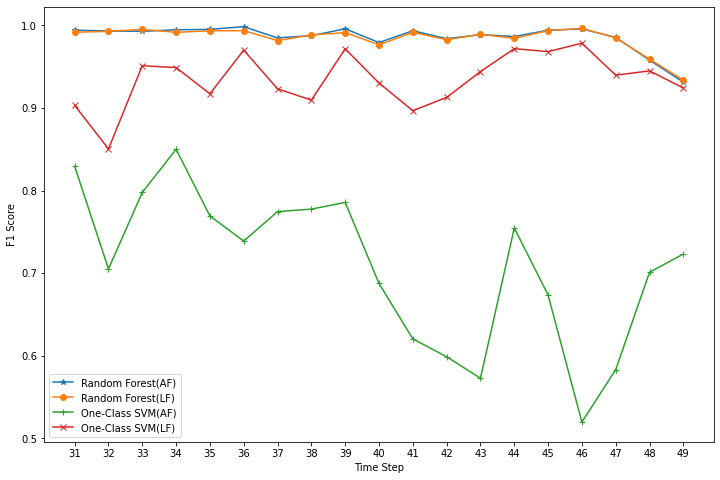

In [111]:
plt.figure(figsize=(12,8))
plt.plot(Timestep, RF_AF_f1, marker = '*', label = "Random Forest(AF)")
plt.plot(Timestep, RF_LF_f1, marker = 'o', label = "Random Forest(LF)")
plt.plot(Timestep, SVM_AF_f1, marker = '+', label = "One-Class SVM(AF)")
plt.plot(Timestep, SVM_LF_f1, marker = 'x', label = "One-Class SVM(LF)")
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('F1 Score')
plt.xticks(Timestep)
plt.show()

In [16]:
X = df_class_feature_identified.drop(columns=['txId', 'class', 'time step']) # drop class, text id and time step
y = df_class_feature_identified[['class']]

y_new = [-1 if i=='1' else 1 for i in y.values]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

print("Train by SVM")
param_grid = {
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['poly', 'rbf', 'sigmoid'],
}
Model_SVM = svm.OneClassSVM()
clf = GridSearchCV(Model_SVM, param_grid, refit=True, verbose=2, scoring="accuracy", return_train_score=True)
clf = clf.fit(X, y_new)
print("done")

Train by SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................gamma=0.01, kernel=poly; total time= 3.3min
[CV] END ............................gamma=0.01, kernel=poly; total time= 3.7min
[CV] END ............................gamma=0.01, kernel=poly; total time= 3.7min
[CV] END ............................gamma=0.01, kernel=poly; total time= 3.7min
[CV] END ............................gamma=0.01, kernel=poly; total time= 3.6min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 5.4min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 5.1min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 5.2min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 5.3min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 5.2min
[CV] END .........................gamma=0.01, kernel=sigmoid; total time= 3.1min
[CV] END .........................g

In [ ]:
import pickle
with open("./Model/OneClassSVM.pkl", "wb") as f:
    pickle.dump(clf.best_estimator_,f )

print("Best SCore:")
print(clf.best_score_)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
kernel = ['poly', 'rbf', 'sigmoid']
gamma = [0.01, 0.1, 1]

scores = [x for x in clf.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(gamma),len(kernel))

for ind, i in enumerate(kernel):
    plt.plot(gamma, scores[ind], label = i)
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

print("Train by SVM")
param_grid = {
    'gamma': [0.01, 0.1, 1],
    'nu': [0.01, 0.1, 1],
}
Model_SVM = svm.OneClassSVM(kernel = 'poly')
clf = GridSearchCV(Model_SVM, param_grid, refit=True, verbose=2, scoring="accuracy", return_train_score=True)
clf = clf.fit(X, y_new)
print("done")

Train by SVM
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................gamma=0.01, nu=0.01; total time=  14.0s
[CV] END ................................gamma=0.01, nu=0.01; total time=  15.5s
[CV] END ................................gamma=0.01, nu=0.01; total time=  16.2s
[CV] END ................................gamma=0.01, nu=0.01; total time=  16.4s
[CV] END ................................gamma=0.01, nu=0.01; total time=  14.3s
[CV] END .................................gamma=0.01, nu=0.1; total time= 1.2min
[CV] END .................................gamma=0.01, nu=0.1; total time= 1.5min
[CV] END .................................gamma=0.01, nu=0.1; total time= 1.5min
[CV] END .................................gamma=0.01, nu=0.1; total time= 1.6min
[CV] END .................................gamma=0.01, nu=0.1; total time= 1.6min
[CV] END ...................................gamma=0.01, nu=1; total time= 3.1min
[CV] END ...........................

In [18]:
import pickle
with open("./Model/OneClassSVM_rbf.pkl", "wb") as f:
    pickle.dump(clf.best_estimator_,f )

print("Best SCore:")
print(clf.best_score_)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best SCore:
0.8475225136093618
Best estimator found by grid search:
OneClassSVM(gamma=0.1, kernel='poly', nu=0.01)


In [22]:
print(clf.cv_results_['mean_test_score'])

[0.84747956 0.81170072 0.09760659 0.84752251 0.81172219 0.09760659
 0.84752251 0.81172219 0.09760659]


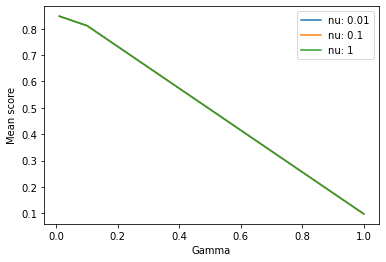

In [24]:
gamma = [0.01, 0.1, 1]
nu = [0.01, 0.1, 1]

scores = [x for x in clf.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(gamma),len(nu))

for ind, i in enumerate(nu):
    plt.plot(gamma, scores[ind], label = "nu: " + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [41]:
print("Train by RF")
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [50,100,150],
}
Model_RF = RandomForestClassifier(n_estimators=100, bootstrap=False)
clf = GridSearchCV(Model_RF, param_grid, refit=True, verbose=2, scoring="accuracy", return_train_score=True)
clf = clf.fit(X.values, y.values.ravel())
print("done")

Train by RF
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=  18.3s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=  18.6s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=  18.2s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=  18.1s
[CV] END ...................max_depth=50, min_samples_leaf=1; total time=  17.2s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=  18.3s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=  18.2s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=  18.4s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=  18.1s
[CV] END ...................max_depth=50, min_samples_leaf=2; total time=  17.2s
[CV] END ...................max_depth=50, min_samples_leaf=3; total time=  18.3s
[CV] END ...................max_depth

In [42]:
import pickle
with open("./Model/Random Forest.pkl", "wb") as f:
    pickle.dump(clf.best_estimator_,f )

print("Best SCore:")
print(clf.best_score_)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best SCore:
0.9827759011439872
Best estimator found by grid search:
RandomForestClassifier(bootstrap=False, max_depth=50)


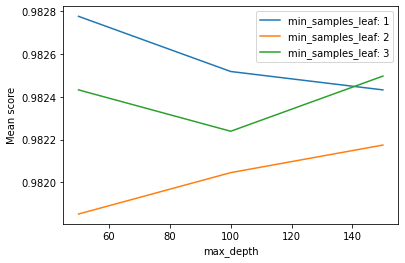

In [46]:
min_samples_leaf = [1,2,3]
max_depth = [50,100,150]

scores = [x for x in clf.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(max_depth),len(min_samples_leaf))

for ind, i in enumerate(min_samples_leaf):
    plt.plot(max_depth, scores[ind], label ="min_samples_leaf: " + str(i))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Mean score')
plt.show()

In [ ]:
X_preds = df_class_feature_unknown.drop(columns=['txId', 'class', 'time step'])
y_preds = model_RF.predict(X_preds.values)

In [19]:
df_class_result = df_class_unknown.copy()
df_class_result.loc[:, 'class'] = y_preds

df_unknown_result = pd.merge(df_class_result, df_features_unknown)
df_unknown_result.loc[:, 'class'] = y_preds
df_unknown_result.head()

,txId,class,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,2,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,2,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,2,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,230460314,2,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,2,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [20]:
df_unknown_result['class'].value_counts()

2    148570
1      8635
Name: class, dtype: int64

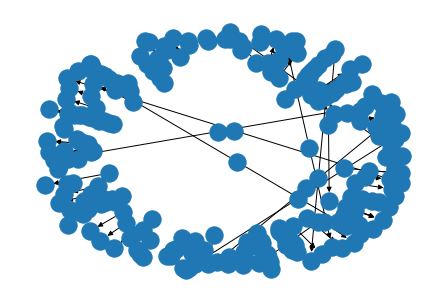

In [21]:
ilicit_ids = df_unknown_result.loc[(df_unknown_result['time step'] == 20) & (df_unknown_result['class'] == "1"), 'txId']
ilicit_edges = df_edges_unknown.loc[df_edges_unknown['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

In [24]:
print(df_edge)

            txId1      txId2
0       230425980    5530458
1       232022460  232438397
2       230460314  230459870
3       230333930  230595899
4       232013274  232029206
...           ...        ...
234350  158365409  157930723
234351  188708874  188708879
234352  157659064  157659046
234353   87414554  106877725
234354  158589452  158589457

[234355 rows x 2 columns]


In [26]:
# plt.figure(figsize=(8,6))
# ilicit_ids = df_unknown_result.loc[df_unknown_result['class'] == "2", 'txId']
# ilicit_edges = df_edges_unknown.loc[df_edges_unknown['txId1'].isin(ilicit_ids)]

# full_graph = nx.from_pandas_edgelist(df_edge, source = 'txId1', target = 'txId2', 
#                                  create_using = nx.DiGraph())
# ilicit_graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
#                                  create_using = nx.DiGraph())

# pos = nx.spring_layout(graph, seed = 100)
# nx.draw(graph, pos=pos, node_size=20, alpha=0.05)

# full_graph_with_ilicit_nodes = nx.Graph(ilicit_graph)
# nx.draw(full_graph_with_ilicit_nodes, pos=pos, node_size=20, edge_color='blue', node_color='red')
# plt.title('Ilicit Matching on Complete Graph')
# plt.show()

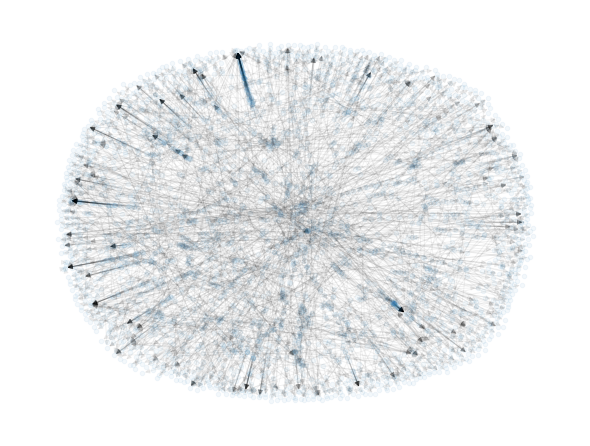

In [23]:
plt.figure(figsize=(8,6))
ilicit_ids = df_unknown_result.loc[(df_unknown_result['time step'] == 20) & (df_unknown_result['class'] == "2"), 'txId']
ilicit_edges = df_edges_unknown.loc[df_edges_unknown['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, node_size=20, alpha=0.05)
plt.show()

In [ ]:
from time import time
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

print("Train by KMeans")
t0 = time()
param_grid = {
    'n_init' : [1000,2000,3000],
    'max_iter' : [5000,10000,15000]
}
K_Means = KMeans(n_clusters=2)
clf = GridSearchCV(K_Means, param_grid, return_train_score=False)
clf = clf.fit(X, y)
print("done in %0.3fs" % (time() - t0))
print("Best SCore:")
print(clf.best_score_)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Train by KMeans
